# Lecture 11: Functional Programming

In [81]:
from IPython.display import clear_output

#### Review from last time:
We saw more about how you can use IPython to explore object internals

Wrote special functions, learned about inheritance, saw how Python uses special functions

In [8]:
class Quaternion:
    def __init__(self, cx, ci, cj, ck):
        self._cx = cx
        self._ci = ci
        self._cj = cj
        self._ck = ck
        
    def __repr__(self):
        return '%.2f + %.2fi + %.2fj + %.2fk' % \
            (self._cx, self._ci, self._cj, self._ck)
        
    def __add__(self, o):
        return Quaternion(self._cx + o._cx, self._ci + o._ci, self._cj + o._cj, self._ck + o._ck)
    
    # how do we support +, -?
    
p = Quaternion(0, 1, 2, 3)
q = Quaternion(-1, 1, -1, 3.14159)
print(p+q)

-1.00 + 2.00i + 1.00j + 6.14k


## Lis(z)t Comprehensions 

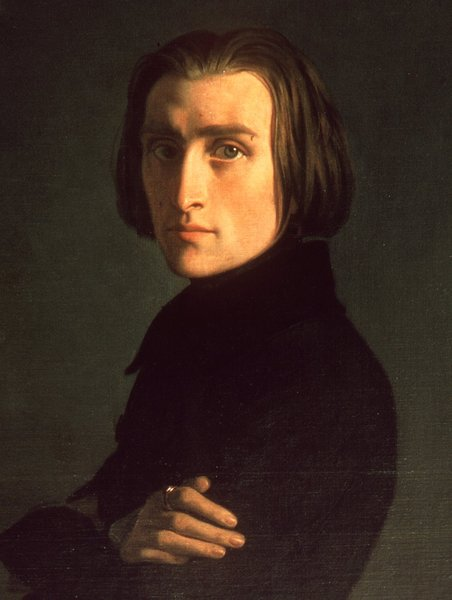

In [73]:
from IPython.display import Image
Image(filename = 'Franz_Liszt.jpg', width = 300)


We've seen how to do common operations with lists. How would you square all elements in a list?

In [74]:
lizst = range(20)
lizst2 = []

for i in lizst:
    lizst2.append(i**2)
    
print(lizst2)
    

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


We can do the 'for' loop all on one line! 

In [75]:
lizst = range(20)
lizst3 = [x**2 for x in lizst]
print(lizst3)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


**List comprehensions** are a useful way to compactify for-loops that involve functions of list elements. 

We can think of a 'for' loop in python as having three pieces:



In [ ]:
for _ in _:
    _

# or

for name in data:
    formula(name)

List comprehensions are similar...

In [80]:
[formula(name) for name in data]

**Data** is some input list, like range(10) or np.loadtxt('foo.txt')

**Name** is just a symbol that is sequentially assigned to everything in the list, just like the "for in"

**Formula** describes how to build a new element out of the one inside 'name'

Let's say we wanted to remove whitespace from a bunch of strings

In [4]:
string_to_strip = ['unnecessary    whitespace ', 'this one is fine', '    a  ']
[ " ".join(s.split()) for s in string_to_strip]
# formula(s)
# how can we fix them all with list comprehensions?

['unnecessary whitespace', 'this one is fine', 'a']

So this is all we need from list comprehensions, right?
Well, not really...

What if you want to conditionally apply operations? 



In [2]:
items = [3, 'five', float('inf'), 42, 'a house']
new_items = []

# only keep the numbery things

# iterate
for item in items:
    if isinstance(item, (int, float, complex)):
        new_items.append(item)
        
print(new_items)

[3, inf, 42]


How would you do this with a list comprehension?

In [6]:
new_items2 = [item for item in new_items if isinstance(item, (int,float,complex))]
print(new_items2)

[3, inf, 42]


In [ ]:
# Full syntax is 

[formula for name in data if condition]

# the condition is an expression of the name just like formula

But wait, there's more!

What if you wanted to do a double 'for' loop?

In [6]:
# Unpack a list of strings into its composite characters?

strings = ['physics91si','is','the','best']
new_strings = []

for s in strings:
    for char in s:
        new_strings.append(char)
        
print(new_strings)
        

['p', 'h', 'y', 's', 'i', 'c', 's', '9', '1', 's', 'i', 'i', 's', 't', 'h', 'e', 'b', 'e', 's', 't']


In [7]:
# How would I do it for a list comprehension
new_strings2 = [char for s in strings for char in s]

print(new_strings2)

['p', 'h', 'y', 's', 'i', 'c', 's', '9', '1', 's', 'i', 'i', 's', 't', 'h', 'e', 'b', 'e', 's', 't']


Moral of the story:

- List manipulations are so common that Python has special syntax to handle them
- Python list comprehensions make code shorter and usually more readable

## More Functional Programming - Onto Actual Functions!

There exists a function called a **map**. Map takes in two parameters:

> ``` map(function,list)```

In [26]:
from math import sqrt
map(sqrt,[1,2,3])

In [28]:
list(map(sqrt,[1,2,3]))

[1.0, 1.4142135623730951, 1.7320508075688772]

Map is the same as applying a list comprehension! 
> ```map(function,list) = [function(x) for x in list]```

Except it's harder b/c we have define extra functions, e.g. squaring

In [24]:
# Need extra function statement
def square(x):
    return x**2

list(map(square,[1,2,3]))

[1, 4, 9]

But wait, there's more! We have a built-in function generator!

In [8]:
# syntax is 
# lambda {parameters}: {formula of parameters}

# for instance our square function:
def square(x):
    return x**2

# Is the same as this lambda
f = lambda x: x**2
print(f(12))
m = map(lambda x: x**2, [1,2,3])
print(list(m))

print(list(map(square,[1,2,3])))

144
[1, 4, 9]
[1, 4, 9]


Lambdas are a useful way of constructing function objects! 

They can construct functions that you don't want to define outside your function scope.

They get compiled only when you run that particular line, so you can customize them based on data from user input.

In [33]:
# lots of fun ways to use them
# stick them directly inside of a map
# make list of pairs of the form (x, x**2)

list(  map(lambda n: (n, n**2), range(10)) )

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

But wait, couldn't list comprehensions do conditionals as well?

Answer: **Filters**

Very similar to maps.

In [10]:
# How do we get the negative numbers from a list?
# We did this for numpy arrays

import numpy as np
franz = [0,1,-1,2,-2,3,-3]
arr = np.array(franz)
print(arr[arr<0])

[-1 -2 -3]


In [11]:
# functions like these that return True/False
# are often called 'predicates'
def negative(x):
    return x < 0

# use a filter command!
list(filter(lambda n: n < 0, franz))

[-1, -2, -3]

In [12]:
liszt = range(10)
sum = 0
for i in liszt:
    sum += i
print(sum)

45


In [ ]:
# What list comprehension is this equivalent to?

filter(predicate, liszt)

# equivalent to



Aha!
So every list comprehension is equivalent to a map after a filter:

In [ ]:
[f(x) for x in ls if predicate(x)]

# equivalent to



So now we can manipulate sets of data and transform them into other data. 

How do we change them to get a result in the end?

Need to **reduce** our data into a single answer

Syntax looks a bit different from map/filter.

> ```reduce(binary function, liszt) ```

Command iteratively applies the binary function to adjacent elements of the liszt.

In [46]:
# Let's see how to add a list of numbers:

# First, a Python 3 thing

from functools import reduce

reduce(lambda x, y: x+y, range(1,10))

45

Say we had a list 

>`liszt = [1,2,3,4,5]` 

and the binary function 

>`multiply`

Then we have 

>```reduce(multiply, liszt) = ((((1*2)*3)*4)*5)```

#### When to use functional programming in Python

It can be easy to get carried away with nested maps/filters/reduces and list comprehensions

Although there are languages that encourage functional programming everywhere, Pyhton is not one of them, and it is not outfitted for working effectively in this style

As a rule of thumb:
- Don't use FP if the FP solution will be longer than a few lines
- Don't use FP if you need to specify how to iterate
- DO use FP inside OOP code and methods, if it makes things simpler and easier to read

In [ ]:
# Before we break for lab, let's work 
# through an example
from functools import reduce
# Get the length of string of all numbers between 0 and 100000
%time
r = list(range(1000000))
f = lambda x,y: x + y
liszt = list(map(lambda x:str(x),r))
print(len(reduce(f,liszt)))



In [50]:
%time
len(reduce(lambda x,y:str(x)+str(y),range(1000000)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


KeyboardInterrupt: 

In [48]:
%time 
r = range(1000000)
reduce(lambda x,y: x+y,list(map(lambda x:len(x),list(map(lambda x:str(x),r)))))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


488890

In [ ]:
### Syntax review:

# ALSO: Ternary operator:
# allows you to use one computation, OR another:
# ex
'number' if isinstance(n, (int, float, complex)) else 'other'

# abstractly:
# list comprehension
[formula for name in ls]

# map
map(function, ls)

#filter
filter(predicate, ls)

# reduce
reduce(combining_function, ls[, starting value]) # starting value optional!

# lambda
lambda parameters: expression

### Some concrete examples:

# numbers in range(40) that contain a 3
print(list(filter(lambda n: '3' in str(n), range(40))))

# you can be gauss - sum ALL the numbers!
print(reduce(lambda x,y: x + y, range(100)))

# remove whitespace and remove comments from a python file
[" ".join(line.split()) for line in open("python_file.py") \
 if not line.startswith('#')]